In [1]:
import pandas as pd

In [2]:
import numpy as np
import seaborn as sns

In [4]:
import matplotlib as plt

In [6]:
links_df=pd.read_csv(r"C:\Users\hp\Downloads\movie_data\links.csv")
movies_df=pd.read_csv(r"C:\Users\hp\Downloads\movie_data\movies.csv")
ratings_df=pd.read_csv(r"C:\Users\hp\Downloads\movie_data\ratings.csv")
tags_df=pd.read_csv(r"C:\Users\hp\Downloads\movie_data\tags.csv")

In [7]:
movies_df.shape

(9742, 3)

In [8]:
ratings_df.shape

(100836, 4)

In [9]:
unique_user_ids = ratings_df['userId'].nunique()
unique_user_ids

610

In [10]:
# Find the movieId that has received the maximum number of user ratings
most_rated_movie_id = ratings_df['movieId'].value_counts().idxmax()

# Get the movie title corresponding to this movieId
most_rated_movie_title = movies_df[movies_df['movieId'] == most_rated_movie_id]['title'].values[0]
most_rated_movie_title

'Forrest Gump (1994)'

In [11]:
# Check if "Matrix, The (1999)" is in the movies dataframe and retrieve its movieId
matrix_movie_id = movies_df[movies_df['title'] == "Matrix, The (1999)"]['movieId'].values[0]
matrix_movie_id

2571

In [12]:
# Get all tags associated with this movieId
matrix_tags = tags_df[tags_df['movieId'] == matrix_movie_id]['tag'].unique()


In [13]:
# List of tags to verify
tags_to_verify = ["alternate universe", "karate", "philosophy", "post apocalyptic"]

# Check which of these tags are in the matrix_tags
correct_tags = [tag for tag in tags_to_verify if tag in matrix_tags]
correct_tags


['alternate universe', 'philosophy', 'post apocalyptic']

In [14]:
# Get the movieId for "Terminator 2: Judgment Day (1991)"
terminator_movie_id = movies_df[movies_df['title'] == "Terminator 2: Judgment Day (1991)"]['movieId'].values[0]


In [15]:
# Filter all ratings for this movieId
terminator_ratings = ratings_df[ratings_df['movieId'] == terminator_movie_id]['rating']


In [16]:
# Calculate the average rating
average_rating = terminator_ratings.mean()
average_rating


3.970982142857143

In [17]:
import matplotlib.pyplot as plt

C:\Users\hp\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


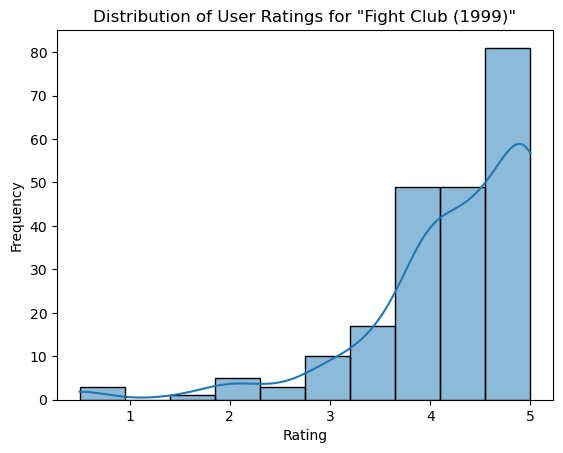

In [18]:
# Step 1: Get the movieId for "Fight Club (1999)"
fight_club_movie_id = movies_df[movies_df['title'] == "Fight Club (1999)"]['movieId'].values[0]

# Step 2: Filter all ratings for this movieId
fight_club_ratings = ratings_df[ratings_df['movieId'] == fight_club_movie_id]['rating']

# Step 3: Visualize the distribution
sns.histplot(fight_club_ratings, bins=10, kde=True)
plt.title('Distribution of User Ratings for "Fight Club (1999)"')
plt.xlabel('Rating')
plt.ylabel('Frequency')
plt.show()

In [20]:
# Step 1: Group by movieId and aggregate ratings (count and mean)
grouped_ratings = ratings_df.groupby('movieId').agg({'rating': ['count', 'mean']})
grouped_ratings.columns = ['rating_count', 'rating_mean']  # Rename columns for clarity

# Step 2: Inner join with movies DataFrame
merged_df = pd.merge(movies_df, grouped_ratings, on='movieId', how='inner')

# Step 3: Filter movies with more than 50 user ratings
filtered_movies_df = merged_df[merged_df['rating_count'] > 50]

In [21]:
# Find the movie with the highest average rating
most_popular_movie = filtered_movies_df.loc[filtered_movies_df['rating_mean'].idxmax()]

# Extract the movie title
most_popular_movie_title = most_popular_movie['title']
most_popular_movie_title

'Shawshank Redemption, The (1994)'

In [22]:
# Sort the DataFrame by the number of user ratings in descending order
top_movies_by_ratings_count = filtered_movies_df.sort_values(by='rating_count', ascending=False).head(5)

# Extract the titles of the top 5 movies
top_5_titles = top_movies_by_ratings_count['title'].tolist()
top_5_titles

['Forrest Gump (1994)',
 'Shawshank Redemption, The (1994)',
 'Pulp Fiction (1994)',
 'Silence of the Lambs, The (1991)',
 'Matrix, The (1999)']

In [23]:
# Assuming `filtered_movies_df` is already created from the previous steps

# Filter the DataFrame to include only Sci-Fi movies
sci_fi_movies_df = filtered_movies_df[filtered_movies_df['genres'].str.contains('Sci-Fi')]

# Sort by the number of user ratings in descending order
sorted_sci_fi_movies = sci_fi_movies_df.sort_values(by='rating_count', ascending=False)

# Get the third most popular Sci-Fi movie based on the number of ratings
third_most_popular_sci_fi_movie = sorted_sci_fi_movies.iloc[2]

# Extract the movie title
third_most_popular_sci_fi_movie_title = third_most_popular_sci_fi_movie['title']
third_most_popular_sci_fi_movie_title


'Jurassic Park (1993)'